<a href="https://colab.research.google.com/github/gogowonji/Big-Data-Analysis/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
import os

filelist = os.listdir('/mydrive/bigData')
print(filelist[0])
print(filelist)

관악구.csv
['관악구.csv', '영등포구.csv', '강남구.csv', '성동구.csv', '동작구.csv', '도봉구.csv', '중랑구.csv', '종로구.csv', '광진구.csv', '중구.csv', '강북구.csv', '동대문구.csv', '마포구.csv', '송파구.csv', '금천구.csv', '성북구.csv', '용산구.csv', '강동구.csv', '서대문구.csv', '노원구.csv', '구로구.csv', '강서구.csv', '은평구.csv']


In [4]:
%cd /mydrive/bigData

/content/gdrive/My Drive/bigData


In [5]:
import pandas as pd
for filename in filelist:
  test = pd.read_csv(filename,encoding='CP949', index_col=0, header=0, engine='python')
  print(filename)
  print()
  print(test.head())
  print('------------------------------------------------------------------------------------------------')

관악구.csv

        읍면동명  등록동물수  (등록주체)시군구등록  (등록주체)대행업체등록  (등록주체)기타  내장형_무선인식(RFID)종류  \
시군명                                                                          
서울시 관악구  남현동    871           24           847         7               404   
서울시 관악구  봉천동   9601          481          9120        11              4378   
서울시 관악구  신림동  14555          620         13935        12              6860   

         외장형_무선인식(RFID)종류  인식표_무선인식(RFID)  등록품종수  등록소유자수  동물소유자당등록동물수  \
시군명                                                                     
서울시 관악구               375              92     52     680         1.28   
서울시 관악구              3666            1557    100    7477         1.28   
서울시 관악구              4912            2783    115   10512         1.38   

         해당동의등록대행업체수     데이터기준일자  
시군명                               
서울시 관악구            1  2022-02-22  
서울시 관악구           12  2022-02-22  
서울시 관악구           14  2022-02-22  
------------------------------------------------------

#전처리만

##강남구

In [6]:
temp = pd.read_csv('강남구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

      시군구명   동명  내장형 칩(RFID)  외장형 칩(RFID)  인식표  등록 품종수  동물 소유자수  동물 등록수  \
시도명                                                                       
서울특별시  강남구  개포동         1185         1699  305      74     2459    3189   
서울특별시  강남구  논현동         2010         1430  450      97     2792    3890   
서울특별시  강남구  대치동         1935         1756  518      91     3446    4209   
서울특별시  강남구  도곡동         1327         1279  271      69     2294    2877   
서울특별시  강남구  삼성동         1424         1022  456      88     2152    2902   

           데이터기준일  
시도명                
서울특별시  2022-08-25  
서울특별시  2022-08-25  
서울특별시  2022-08-25  
서울특별시  2022-08-25  
서울특별시  2022-08-25  


In [7]:
print(temp.columns)
print(temp.index)
temp.reset_index(drop=False, inplace=True) #시도명 인덱스 해제
print(temp.columns)
print(temp.head())

Index(['시군구명', '동명', '내장형 칩(RFID)', '외장형 칩(RFID)', '인식표', '등록 품종수', '동물 소유자수',
       '동물 등록수', '데이터기준일'],
      dtype='object')
Index(['서울특별시', '서울특별시', '서울특별시', '서울특별시', '서울특별시', '서울특별시', '서울특별시', '서울특별시',
       '서울특별시', '서울특별시', '서울특별시', '서울특별시', '서울특별시', '서울특별시'],
      dtype='object', name='시도명')
Index(['시도명', '시군구명', '동명', '내장형 칩(RFID)', '외장형 칩(RFID)', '인식표', '등록 품종수',
       '동물 소유자수', '동물 등록수', '데이터기준일'],
      dtype='object')
     시도명 시군구명   동명  내장형 칩(RFID)  외장형 칩(RFID)  인식표  등록 품종수  동물 소유자수  동물 등록수  \
0  서울특별시  강남구  개포동         1185         1699  305      74     2459    3189   
1  서울특별시  강남구  논현동         2010         1430  450      97     2792    3890   
2  서울특별시  강남구  대치동         1935         1756  518      91     3446    4209   
3  서울특별시  강남구  도곡동         1327         1279  271      69     2294    2877   
4  서울특별시  강남구  삼성동         1424         1022  456      88     2152    2902   

       데이터기준일  
0  2022-08-25  
1  2022-08-25  
2  2022-08-25  
3  2022-08-25  
4  2022-08-

In [8]:
gu1=temp[['시군구명', '동물 등록수']]
gu1 = gu1.rename(columns={'시군구명': '자치구'})
print(gu1.head())

   자치구  동물 등록수
0  강남구    3189
1  강남구    3890
2  강남구    4209
3  강남구    2877
4  강남구    2902


In [9]:
print(gu1['동물 등록수'].sum())

31371


In [10]:
gu1['총동물등록수'] = 31371
print(gu1.head())

   자치구  동물 등록수  총동물등록수
0  강남구    3189   31371
1  강남구    3890   31371
2  강남구    4209   31371
3  강남구    2877   31371
4  강남구    2902   31371


In [11]:
gu1 = gu1[:1]
gu1 = gu1[['자치구','총동물등록수']]
print(gu1)

   자치구  총동물등록수
0  강남구   31371


##동작구

In [12]:
temp = pd.read_csv('동작구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

           법정동   내장형   외장형  인식표  반려동물총계  등록품종수  동물소유자수  동물소유자당동물등록수
시군구                                                                
서울특별시 동작구   본동   255   216   68     539     53     428         1.26
서울특별시 동작구  대방동   768   871  230    1869     72    1510         1.24
서울특별시 동작구  동작동   154   127   24     305     41     256         1.19
서울특별시 동작구  사당동  2196  2236  454    4886    101    3701         1.32
서울특별시 동작구  상도동  2700  2368  593    5661     93    4437         1.28


In [13]:
temp.reset_index(drop=False, inplace=True) # 인덱스 해제
print(temp.head())

         시군구  법정동   내장형   외장형  인식표  반려동물총계  등록품종수  동물소유자수  동물소유자당동물등록수
0  서울특별시 동작구   본동   255   216   68     539     53     428         1.26
1  서울특별시 동작구  대방동   768   871  230    1869     72    1510         1.24
2  서울특별시 동작구  동작동   154   127   24     305     41     256         1.19
3  서울특별시 동작구  사당동  2196  2236  454    4886    101    3701         1.32
4  서울특별시 동작구  상도동  2700  2368  593    5661     93    4437         1.28


In [14]:
gu2 = temp[['반려동물총계']]
gu2['자치구'] = '동작구'
gu2 = gu2[['자치구','반려동물총계']]
print(gu2.head())
print(gu2['반려동물총계'].sum())

   자치구  반려동물총계
0  동작구     539
1  동작구    1869
2  동작구     305
3  동작구    4886
4  동작구    5661
18989


<ipython-input-14-8dba6c8d2149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu2['자치구'] = '동작구'


In [15]:
gu2['총동물등록수'] = 18989
gu2=gu2[:1]
gu2=gu2[['자치구','총동물등록수']]
print(gu2)

   자치구  총동물등록수
0  동작구   18989


##종로구

In [16]:
temp = pd.read_csv('종로구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     법정동명  등록동물수(마리)  등록품종수  등록소유자수  동물소유자당등록동물수  해당동의등록대행업체수
자치구명                                                         
종로구    계동         87     21      70         1.24           85
종로구    재동          7      3       6         1.17            6
종로구    평동         47     15      38         1.24           44
종로구    화동          9      6       9         1.00            9
종로구   가회동        112     40      74         1.51          109


In [17]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

  자치구명 법정동명  등록동물수(마리)  등록품종수  등록소유자수  동물소유자당등록동물수  해당동의등록대행업체수
0  종로구   계동         87     21      70         1.24           85
1  종로구   재동          7      3       6         1.17            6
2  종로구   평동         47     15      38         1.24           44
3  종로구   화동          9      6       9         1.00            9
4  종로구  가회동        112     40      74         1.51          109


In [18]:
print(temp['등록동물수(마리)'].sum())

10418


In [19]:
gu3 = temp[['자치구명','등록동물수(마리)']]
gu3 = gu3.rename(columns={'자치구명': '자치구'})
print(gu3.head())
print(gu3['등록동물수(마리)'].sum())

   자치구  등록동물수(마리)
0  종로구         87
1  종로구          7
2  종로구         47
3  종로구          9
4  종로구        112
10418


In [20]:
gu3['총동물등록수'] = 10418
gu3 = gu3[:1]
gu3 = gu3[['자치구','총동물등록수']]
print(gu3)

   자치구  총동물등록수
0  종로구   10418


##송파구

In [21]:
temp = pd.read_csv('송파구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     법정동명  등록동물수(마리)  등록품종수  등록소유자수  동물소유자당등록동물수  해당동의등록대행업체수     데이터기준일자
자치구명                                                                     
송파구   가락동       3195     72    2642         1.21            6  2021-09-16
송파구   거여동       1531     64    1184         1.29            4  2021-09-16
송파구   마천동       1728     62    1318         1.31            2  2021-09-16
송파구   문정동       3233     86    2616         1.24            8  2021-09-16
송파구   방이동       3056     74    2410         1.27            3  2021-09-16


In [22]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

print(temp['등록동물수(마리)'].sum())

  자치구명 법정동명  등록동물수(마리)  등록품종수  등록소유자수  동물소유자당등록동물수  해당동의등록대행업체수     데이터기준일자
0  송파구  가락동       3195     72    2642         1.21            6  2021-09-16
1  송파구  거여동       1531     64    1184         1.29            4  2021-09-16
2  송파구  마천동       1728     62    1318         1.31            2  2021-09-16
3  송파구  문정동       3233     86    2616         1.24            8  2021-09-16
4  송파구  방이동       3056     74    2410         1.27            3  2021-09-16
30488


In [23]:
gu4 = temp[['자치구명']]
gu4['총동물등록수'] = 30488
gu4 = gu4.rename(columns = {'자치구명':'자치구'})
gu4 = gu4[:1]
print(gu4)

   자치구  총동물등록수
0  송파구   30488


<ipython-input-23-eaf84ea4101a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu4['총동물등록수'] = 30488


#자치구추가

##관악구

In [24]:
import pandas as pd
temp = pd.read_csv('관악구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())


        읍면동명  등록동물수  (등록주체)시군구등록  (등록주체)대행업체등록  (등록주체)기타  내장형_무선인식(RFID)종류  \
시군명                                                                          
서울시 관악구  남현동    871           24           847         7               404   
서울시 관악구  봉천동   9601          481          9120        11              4378   
서울시 관악구  신림동  14555          620         13935        12              6860   

         외장형_무선인식(RFID)종류  인식표_무선인식(RFID)  등록품종수  등록소유자수  동물소유자당등록동물수  \
시군명                                                                     
서울시 관악구               375              92     52     680         1.28   
서울시 관악구              3666            1557    100    7477         1.28   
서울시 관악구              4912            2783    115   10512         1.38   

         해당동의등록대행업체수     데이터기준일자  
시군명                               
서울시 관악구            1  2022-02-22  
서울시 관악구           12  2022-02-22  
서울시 관악구           14  2022-02-22  


In [25]:
print(temp.columns)
print(temp.index)
temp.reset_index(drop=False, inplace=True) #시군명 인덱스 해제
print(temp.columns)
print(temp.head())


Index(['읍면동명', '등록동물수', '(등록주체)시군구등록', '(등록주체)대행업체등록', '(등록주체)기타',
       '내장형_무선인식(RFID)종류', '외장형_무선인식(RFID)종류', '인식표_무선인식(RFID)', '등록품종수',
       '등록소유자수', '동물소유자당등록동물수', '해당동의등록대행업체수', '데이터기준일자'],
      dtype='object')
Index(['서울시 관악구', '서울시 관악구', '서울시 관악구'], dtype='object', name='시군명')
Index(['시군명', '읍면동명', '등록동물수', '(등록주체)시군구등록', '(등록주체)대행업체등록', '(등록주체)기타',
       '내장형_무선인식(RFID)종류', '외장형_무선인식(RFID)종류', '인식표_무선인식(RFID)', '등록품종수',
       '등록소유자수', '동물소유자당등록동물수', '해당동의등록대행업체수', '데이터기준일자'],
      dtype='object')
       시군명 읍면동명  등록동물수  (등록주체)시군구등록  (등록주체)대행업체등록  (등록주체)기타  내장형_무선인식(RFID)종류  \
0  서울시 관악구  남현동    871           24           847         7               404   
1  서울시 관악구  봉천동   9601          481          9120        11              4378   
2  서울시 관악구  신림동  14555          620         13935        12              6860   

   외장형_무선인식(RFID)종류  인식표_무선인식(RFID)  등록품종수  등록소유자수  동물소유자당등록동물수  해당동의등록대행업체수  \
0               375              92     52     680         1.28            

In [26]:
temp1=pd.DataFrame(temp['시군명'].apply(lambda v:v.split()[0:2]).tolist(),columns=('시','자치구'))
print(temp1.head())


     시  자치구
0  서울시  관악구
1  서울시  관악구
2  서울시  관악구


In [27]:
gu5 = pd.concat([temp,temp1],axis=1)
gu5=gu5[['자치구','등록동물수']]
print(gu5)


   자치구  등록동물수
0  관악구    871
1  관악구   9601
2  관악구  14555


In [28]:
print(gu5['등록동물수'].sum())

25027


In [29]:
gu5['총동물등록수'] = 25027
print(gu5)

   자치구  등록동물수  총동물등록수
0  관악구    871   25027
1  관악구   9601   25027
2  관악구  14555   25027


In [30]:
gu5=gu5[['자치구','총동물등록수']]
gu5 = gu5[:1]
print(gu5)

   자치구  총동물등록수
0  관악구   25027


##영등포구

In [31]:
temp = pd.read_csv('영등포구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

          내장형 무선식별(RFID)  외장형 무선식별(RFID)  인식표 무선식별(RFID)  동물등록수합계(마리)  \
읍면동(법정동)                                                                
당산동                  152             145              27          324   
대림동                 1141            1309             325         2775   
도림동                  503             463             103         1069   
신길동                 2472            2366             622         5460   
여의도동                 845             897             387         2129   

          동물소유자수(명)  
읍면동(법정동)             
당산동             269  
대림동            2197  
도림동             832  
신길동            4254  
여의도동           1678  


In [32]:
print(temp.columns)
print(temp.index)
temp.reset_index(drop=False, inplace=True) #시군명 인덱스 해제
print(temp.columns)
print(temp.head())

Index(['내장형 무선식별(RFID)', '외장형 무선식별(RFID)', '인식표 무선식별(RFID)', '동물등록수합계(마리)',
       '동물소유자수(명)'],
      dtype='object')
Index(['당산동', '대림동', '도림동', '신길동', '여의도동', '영등포동', '당산동1가', '당산동2가', '당산동3가',
       '당산동4가', '당산동5가', '당산동6가', '문래동1가', '문래동2가', '문래동3가', '문래동4가', '문래동5가',
       '문래동6가', '양평동1가', '양평동2가', '양평동3가', '양평동4가', '양평동5가', '양평동6가', '영등포동1가',
       '영등포동2가', '영등포동3가', '영등포동4가', '영등포동5가', '영등포동6가', '영등포동7가', '영등포동8가'],
      dtype='object', name='읍면동(법정동)')
Index(['읍면동(법정동)', '내장형 무선식별(RFID)', '외장형 무선식별(RFID)', '인식표 무선식별(RFID)',
       '동물등록수합계(마리)', '동물소유자수(명)'],
      dtype='object')
  읍면동(법정동)  내장형 무선식별(RFID)  외장형 무선식별(RFID)  인식표 무선식별(RFID)  동물등록수합계(마리)  \
0      당산동             152             145              27          324   
1      대림동            1141            1309             325         2775   
2      도림동             503             463             103         1069   
3      신길동            2472            2366             622         5460   
4     여의도동           

In [33]:
gu6=temp[['동물등록수합계(마리)']]
print(gu6.head())

   동물등록수합계(마리)
0          324
1         2775
2         1069
3         5460
4         2129


In [34]:
print(gu6['동물등록수합계(마리)'].sum())


20566


In [35]:
gu6['총동물등록수'] = 20566
print(gu6.head())

   동물등록수합계(마리)  총동물등록수
0          324   20566
1         2775   20566
2         1069   20566
3         5460   20566
4         2129   20566


<ipython-input-35-0d7fb49404c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu6['총동물등록수'] = 20566


In [36]:
gu6 = gu6[:1]
gu6['자치구'] = '영등포구'
gu6 = gu6[['자치구','총동물등록수']]
print(gu6)

    자치구  총동물등록수
0  영등포구   20566


##성동구

In [37]:
temp = pd.read_csv('성동구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

      등록수     데이터기준일자
법정동                  
도선동   267  2022-08-18
마장동  1067  2022-08-18
사근동   313  2022-08-18
송정동   677  2022-08-18
옥수동  1612  2022-08-18


In [38]:
temp.reset_index(drop=False, inplace=True) # 인덱스 해제
print(temp.head())

   법정동   등록수     데이터기준일자
0  도선동   267  2022-08-18
1  마장동  1067  2022-08-18
2  사근동   313  2022-08-18
3  송정동   677  2022-08-18
4  옥수동  1612  2022-08-18


In [39]:
gu7 = temp[['등록수']]
gu7['자치구'] = '성동구'
print(gu7.head())

    등록수  자치구
0   267  성동구
1  1067  성동구
2   313  성동구
3   677  성동구
4  1612  성동구


<ipython-input-39-bc03b0ebe17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu7['자치구'] = '성동구'


In [40]:
print(gu7['등록수'].sum())

16943


In [41]:
gu7['총동물등록수'] = 16943
gu7=gu7[:1]
gu7=gu7[['자치구','총동물등록수']]
print(gu7)

   자치구  총동물등록수
0  성동구   16943


##도봉구

In [42]:
temp = pd.read_csv('도봉구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

         등록수
행정동         
쌍문동   3,717건
방학동   3,481건
도봉동   2,081건
창  동  5,397건


In [43]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

    행정동     등록수
0   쌍문동  3,717건
1   방학동  3,481건
2   도봉동  2,081건
3  창  동  5,397건


In [44]:
temp1['등록동물수'] = pd.DataFrame(temp['등록수'].apply(lambda v:v.replace(',','')))
temp1 = pd.DataFrame(temp1['등록동물수'].apply(lambda v:v.replace('건','')))
temp1 = pd.DataFrame(temp1['등록동물수'].apply(pd.to_numeric))
print(temp1)

   등록동물수
0   3717
1   3481
2   2081


In [45]:
gu8 = pd.concat([temp,temp1],axis=1)
print(gu8)
print(gu8['등록동물수'].sum())


    행정동     등록수   등록동물수
0   쌍문동  3,717건  3717.0
1   방학동  3,481건  3481.0
2   도봉동  2,081건  2081.0
3  창  동  5,397건     NaN
9279.0


In [46]:
gu8['자치구'] = '도봉구'
gu8['총동물등록수'] = 14676
gu8 = gu8[['자치구','총동물등록수']]
gu8 = gu8[:1]
print(gu8)

   자치구  총동물등록수
0  도봉구   14676


##중랑구

In [47]:
temp = pd.read_csv('중랑구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

          등록주체(시군구)  등록주체(대행업체)  등록주체(기타(이벤트등))  RFID종류(내장형)  RFID종류(외장형)  \
읍면동(법정동)                                                                    
묵동              135        3030               0         1572         1290   
망우동             116        2911               0         1448         1188   
면목동             234        9252               0         4541         3922   
상봉동              91        2786               0         1291         1111   
신내동             110        3145               0         1573         1257   

          RFID종류(인식표)  등록품종수  동물소유자수  동물소유자당동물등록수    합계  
읍면동(법정동)                                                 
묵동                303     81    2488         1.27  3165  
망우동               391     73    2256         1.34  3027  
면목동              1023    100    7221         1.31  9486  
상봉동               475     77    2209         1.30  2877  
신내동               425     75    2612         1.25  3255  


In [48]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

  읍면동(법정동)  등록주체(시군구)  등록주체(대행업체)  등록주체(기타(이벤트등))  RFID종류(내장형)  RFID종류(외장형)  \
0       묵동        135        3030               0         1572         1290   
1      망우동        116        2911               0         1448         1188   
2      면목동        234        9252               0         4541         3922   
3      상봉동         91        2786               0         1291         1111   
4      신내동        110        3145               0         1573         1257   

   RFID종류(인식표)  등록품종수  동물소유자수  동물소유자당동물등록수    합계  
0          303     81    2488         1.27  3165  
1          391     73    2256         1.34  3027  
2         1023    100    7221         1.31  9486  
3          475     77    2209         1.30  2877  
4          425     75    2612         1.25  3255  


In [49]:
gu9 = temp[['합계']]
print(gu9.head())
print(gu9['합계'].sum())

     합계
0  3165
1  3027
2  9486
3  2877
4  3255
24810


In [50]:
gu9['총동물등록수'] = 24810
gu9 = gu9[:1]
gu9['자치구'] = '중랑구'
gu9 = gu9[['자치구','총동물등록수']]


<ipython-input-50-54d267814735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu9['총동물등록수'] = 24810


In [51]:
print(gu9)

   자치구  총동물등록수
0  중랑구   24810


#합치기

##강북구

In [52]:
temp = pd.read_csv('강북구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

          등록주체 시군구  등록주체 대행업체  RFID종류 내장형  RFID종류 외장형  RFID종류 인식표  등록품종수  \
읍면동(법정동)                                                                   
번동           110.0     2490.0      1171.0      1029.0       402.0   66.0   
미아동          242.0     6407.0      3158.0      2084.0      1413.0   81.0   
수유동          277.0     5457.0      2712.0      1749.0      1274.0   86.0   
우이동           28.0      632.0       340.0       205.0       115.0   45.0   
합계           657.0    14986.0      7381.0      5067.0      3204.0  108.0   

           동물소유자수     데이터기준일자  Unnamed: 9  Unnamed: 10  Unnamed: 11  
읍면동(법정동)                                                             
번동         2039.0  2020-09-17         NaN          NaN          NaN  
미아동        5237.0  2020-09-17         NaN          NaN          NaN  
수유동        4399.0  2020-09-17         NaN          NaN          NaN  
우이동         477.0  2020-09-17         NaN          NaN          NaN  
합계        12152.0  2020-09-17         NaN      

In [53]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

  읍면동(법정동)  등록주체 시군구  등록주체 대행업체  RFID종류 내장형  RFID종류 외장형  RFID종류 인식표  등록품종수  \
0       번동     110.0     2490.0      1171.0      1029.0       402.0   66.0   
1      미아동     242.0     6407.0      3158.0      2084.0      1413.0   81.0   
2      수유동     277.0     5457.0      2712.0      1749.0      1274.0   86.0   
3      우이동      28.0      632.0       340.0       205.0       115.0   45.0   
4       합계     657.0    14986.0      7381.0      5067.0      3204.0  108.0   

    동물소유자수     데이터기준일자  Unnamed: 9  Unnamed: 10  Unnamed: 11  
0   2039.0  2020-09-17         NaN          NaN          NaN  
1   5237.0  2020-09-17         NaN          NaN          NaN  
2   4399.0  2020-09-17         NaN          NaN          NaN  
3    477.0  2020-09-17         NaN          NaN          NaN  
4  12152.0  2020-09-17         NaN          NaN          NaN  


In [54]:
temp1 = temp[['등록주체 시군구','등록주체 대행업체']]
temp1 = temp1.fillna(0)
print(temp1)
temp1['동물등록수'] = temp1.sum(axis=1)
print(temp1)

    등록주체 시군구  등록주체 대행업체
0      110.0     2490.0
1      242.0     6407.0
2      277.0     5457.0
3       28.0      632.0
4      657.0    14986.0
5        0.0        0.0
6        0.0        0.0
7        0.0        0.0
8        0.0        0.0
9        0.0        0.0
10       0.0        0.0
11       0.0        0.0
12       0.0        0.0
13       0.0        0.0
    등록주체 시군구  등록주체 대행업체    동물등록수
0      110.0     2490.0   2600.0
1      242.0     6407.0   6649.0
2      277.0     5457.0   5734.0
3       28.0      632.0    660.0
4      657.0    14986.0  15643.0
5        0.0        0.0      0.0
6        0.0        0.0      0.0
7        0.0        0.0      0.0
8        0.0        0.0      0.0
9        0.0        0.0      0.0
10       0.0        0.0      0.0
11       0.0        0.0      0.0
12       0.0        0.0      0.0
13       0.0        0.0      0.0


In [55]:
gu10 = temp1[['동물등록수']]
print(gu10['동물등록수'].sum())

31286.0


In [56]:
gu10 = gu10[:1]
gu10['총동물등록수'] = 31286
gu10['자치구'] = '강북구'
gu10 = gu10[['자치구','총동물등록수']]
print(gu10)

   자치구  총동물등록수
0  강북구   31286


##강동구

In [57]:
temp = pd.read_csv('강동구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     시군구  대행업체  기타(이벤트등)  RFID내장형  RFID외장형  인식표  동물소유자당   집계기준
읍면동                                                           
길동    97  1922         0      836     1062  121    1.26  2021년
강일동   18   796         0      406      387   21    1.17  2021년
고덕동   39  1260         0      626      622   51    1.25  2021년
둔촌동   37  1487         0      611      865   48    1.20  2021년
명일동   30  1504         0      669      794   71    1.19  2021년


In [58]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   읍면동  시군구  대행업체  기타(이벤트등)  RFID내장형  RFID외장형  인식표  동물소유자당   집계기준
0   길동   97  1922         0      836     1062  121    1.26  2021년
1  강일동   18   796         0      406      387   21    1.17  2021년
2  고덕동   39  1260         0      626      622   51    1.25  2021년
3  둔촌동   37  1487         0      611      865   48    1.20  2021년
4  명일동   30  1504         0      669      794   71    1.19  2021년


In [59]:
temp1 = temp[['시군구','대행업체','기타(이벤트등)']]
temp1['동물등록수'] = temp1.sum(axis=1)
print(temp1)

   시군구  대행업체  기타(이벤트등)  동물등록수
0   97  1922         0   2019
1   18   796         0    814
2   39  1260         0   1299
3   37  1487         0   1524
4   30  1504         0   1534
5   24   912         0    936
6  141  2830         0   2971
7   71  3012         0   3083
8  135  3966         0   4101


<ipython-input-59-46b4817264f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['동물등록수'] = temp1.sum(axis=1)


In [60]:
gu11 = temp1[['동물등록수']]
print(gu11['동물등록수'].sum())


18281


In [61]:
gu11 = gu11[:1]
gu11['총동물등록수'] = 18281
gu11['자치구'] = '강동구'
gu11 = gu11[['자치구','총동물등록수']]
print(gu11)

   자치구  총동물등록수
0  강동구   18281


##노원구

In [62]:
temp = pd.read_csv('노원구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     읍면동(법정동)  등록주체(시군구)  등록주체(대행업체)  등록주체(기타(이벤트등))  RFID종류(내장형)  \
년도                                                                  
2012      공릉동          0           8               0            8   
2012      상계동          0           7               0            7   
2012      월계동          0           4               0            4   
2012      중계동          0           1               0            1   
2012      하계동          0           1               0            1   

      RFID종류(외장형)  RFID종류(인식표)  등록 품종수  동물소유자수  동물소유자당동물등록수  합계  미승인  반려  \
년도                                                                         
2012            0            0       7       7         1.14   8    0   0   
2012            0            0       4       5         1.40   7    0   0   
2012            0            0       2       3         1.33   4    0   0   
2012            0            0       1       1         1.00   1    0   0   
2012            0            0       1       1         1.00 

In [63]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

     년도 읍면동(법정동)  등록주체(시군구)  등록주체(대행업체)  등록주체(기타(이벤트등))  RFID종류(내장형)  \
0  2012      공릉동          0           8               0            8   
1  2012      상계동          0           7               0            7   
2  2012      월계동          0           4               0            4   
3  2012      중계동          0           1               0            1   
4  2012      하계동          0           1               0            1   

   RFID종류(외장형)  RFID종류(인식표)  등록 품종수  동물소유자수  동물소유자당동물등록수  합계  미승인  반려  \
0            0            0       7       7         1.14   8    0   0   
1            0            0       4       5         1.40   7    0   0   
2            0            0       2       3         1.33   4    0   0   
3            0            0       1       1         1.00   1    0   0   
4            0            0       1       1         1.00   1    0   0   

         기준일자  
0  2022-08-28  
1  2022-08-28  
2  2022-08-28  
3  2022-08-28  
4  2022-08-28  


In [64]:
gu12 = temp[['합계']]
print(gu12['합계'].sum())

28129


In [65]:
gu12 = gu12[:1]
gu12['자치구'] = '노원구'
gu12['총동물등록수'] = 28129
gu12 = gu12.drop(columns='합계')

In [66]:
print(gu12)

   자치구  총동물등록수
0  노원구   28129


##구로구

In [67]:
temp = pd.read_csv('구로구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     내장형(RFID)  외장형(RFID)  인식표  등록품종수  동물소유자수  동물소유자당동물등록수         기준일
법정동                                                                   
궁동         180        130   27     36     269         1.25  2022-04-30
항동         159         91   39     36     249         1.16  2022-04-30
개봉동       1189        627  185     75    1663         1.20  2022-04-30
고척동        740        310   95     60     959         1.19  2022-04-30
구로동       1457        795  314     75    2172         1.18  2022-04-30


In [68]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   법정동  내장형(RFID)  외장형(RFID)  인식표  등록품종수  동물소유자수  동물소유자당동물등록수         기준일
0   궁동        180        130   27     36     269         1.25  2022-04-30
1   항동        159         91   39     36     249         1.16  2022-04-30
2  개봉동       1189        627  185     75    1663         1.20  2022-04-30
3  고척동        740        310   95     60     959         1.19  2022-04-30
4  구로동       1457        795  314     75    2172         1.18  2022-04-30


In [69]:
temp1 = temp[['내장형(RFID)','외장형(RFID)','인식표']]
temp1['동물등록수'] = temp1.sum(axis=1)
print(temp1)

    내장형(RFID)  외장형(RFID)  인식표  동물등록수
0         180        130   27    337
1         159         91   39    289
2        1189        627  185   2001
3         740        310   95   1145
4        1457        795  314   2566
5         678        311  102   1091
6          96         66   20    182
7         181        106   32    319
8         187         79   21    287
9         424        202   77    703
10        211        174   23    408
11        190        133   39    362
12       1374        778  180   2332
13        859        421   94   1374
14       1608       1072  311   2991
15        746        398  104   1248
16        117         83   20    220
17        210        154   32    396
18        222         98   20    340
19        477        273   77    827


<ipython-input-69-38a8f2022409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['동물등록수'] = temp1.sum(axis=1)


In [70]:
gu13 = temp1[['동물등록수']]
print(gu13['동물등록수'].sum())

19418


In [71]:
gu13 = gu13[:1]
gu13['총동물등록수'] = 19418
gu13['자치구'] = '구로구'
gu13= gu13[['자치구','총동물등록수']]
print(gu13)

   자치구  총동물등록수
0  구로구   19418


<ipython-input-71-64b5c34c671c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu13['총동물등록수'] = 19418
<ipython-input-71-64b5c34c671c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gu13['자치구'] = '구로구'


##강서구

In [72]:
temp = pd.read_csv('강서구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     개등록자수  개등록수  고양이등록자수  고양이등록수        기준일자
법정동                                          
가양동   1707  2165      8.0     9.0  2021-02-22
개화동    109   159      NaN     NaN  2021-02-22
공항동    776  1056      NaN     NaN  2021-02-22
등촌동   2651  3345     15.0    18.0  2021-02-22
마곡동   1162  1393      3.0     4.0  2021-02-22


In [73]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   법정동  개등록자수  개등록수  고양이등록자수  고양이등록수        기준일자
0  가양동   1707  2165      8.0     9.0  2021-02-22
1  개화동    109   159      NaN     NaN  2021-02-22
2  공항동    776  1056      NaN     NaN  2021-02-22
3  등촌동   2651  3345     15.0    18.0  2021-02-22
4  마곡동   1162  1393      3.0     4.0  2021-02-22


In [74]:
temp1 = temp[['개등록수','고양이등록수']]
temp1 = temp1.fillna(0)

temp1['동물등록수'] = temp1.sum(axis=1)
print(temp1.head())

   개등록수  고양이등록수   동물등록수
0  2165     9.0  2174.0
1   159     0.0   159.0
2  1056     0.0  1056.0
3  3345    18.0  3363.0
4  1393     4.0  1397.0


In [75]:
gu14 = temp1[['동물등록수']]
print(gu14['동물등록수'].sum())


28055.0


In [76]:
gu14 = gu14[:1]
gu14['총동물등록수'] = 28055
gu14['자치구'] = '강서구'
gu14 = gu14[['자치구','총동물등록수']]
print(gu14)

   자치구  총동물등록수
0  강서구   28055


##광진구

In [77]:
temp = pd.read_csv('광진구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

          등록주체(시군구)  등록주체(대행업체)  등록주체(기타)  RFID종류(내장형)  RFID종류(외장형)  \
읍면동(법정동)                                                              
능동               15         568         0          256          274   
광장동              37        1931         0         1107          805   
구의동              98        4912         1         2577         2203   
군자동              25        1127         3          489          584   
노유동               0           0         2            2            0   

          RFID종류(인식표)  등록품종수  동물소유자수  
읍면동(법정동)                              
능동                 53     50     463  
광장동                56     66    1587  
구의동               231     74    3848  
군자동                82     55     881  
노유동                 0      2       2  


In [78]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

  읍면동(법정동)  등록주체(시군구)  등록주체(대행업체)  등록주체(기타)  RFID종류(내장형)  RFID종류(외장형)  \
0       능동         15         568         0          256          274   
1      광장동         37        1931         0         1107          805   
2      구의동         98        4912         1         2577         2203   
3      군자동         25        1127         3          489          584   
4      노유동          0           0         2            2            0   

   RFID종류(인식표)  등록품종수  동물소유자수  
0           53     50     463  
1           56     66    1587  
2          231     74    3848  
3           82     55     881  
4            0      2       2  


In [79]:
temp1 = temp[['등록주체(시군구)','등록주체(대행업체)','등록주체(기타)']]
print(temp1.head())
temp1['동물등록수'] = temp1.sum(axis=1)
print(temp1)

   등록주체(시군구)  등록주체(대행업체)  등록주체(기타)
0         15         568         0
1         37        1931         0
2         98        4912         1
3         25        1127         3
4          0           0         2
   등록주체(시군구)  등록주체(대행업체)  등록주체(기타)  동물등록수
0         15         568         0    583
1         37        1931         0   1968
2         98        4912         1   5011
3         25        1127         3   1155
4          0           0         2      2
5         98        5807        12   5917
6         88        4987         5   5080
7         20        1292         6   1318


<ipython-input-79-b0c55b0559da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['동물등록수'] = temp1.sum(axis=1)


In [80]:
gu15 = temp1[['동물등록수']]
print(gu15['동물등록수'].sum())

21034


In [81]:
gu15 = gu15[:1]
gu15['총동물등록수'] = 21034
gu15['자치구'] = '광진구'
gu15 = gu15[['자치구','총동물등록수']]
print(gu15)

   자치구  총동물등록수
0  광진구   21034


#자치구추가

##동대문구

In [82]:
temp = pd.read_csv('동대문구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

          등록주체_시군구  등록주체_대행업체  등록형태_내장형RFID  등록형태_외장형RFID  등록형태_인식표RFID  \
읍면동(법정동)                                                                  
신설동              5        249           107           121            26   
용두동             66       1624           714           859           119   
이문동             57       2613          1225          1300           146   
장안동            140       4421          2027          2298           237   
전농동             80       2331          1314           959           140   

          등록품종수  동물소유자수  동물소유자당동물등록수  총등록수     데이터기준일자  
읍면동(법정동)                                                
신설동          39     183         1.39   254  2022-07-18  
용두동          74    1267         1.34  1692  2022-07-18  
이문동          81    1578         1.69  2671  2022-07-18  
장안동          87    3477         1.31  4562  2022-07-18  
전농동          77    1918         1.26  2413  2022-07-18  


In [83]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

  읍면동(법정동)  등록주체_시군구  등록주체_대행업체  등록형태_내장형RFID  등록형태_외장형RFID  등록형태_인식표RFID  \
0      신설동         5        249           107           121            26   
1      용두동        66       1624           714           859           119   
2      이문동        57       2613          1225          1300           146   
3      장안동       140       4421          2027          2298           237   
4      전농동        80       2331          1314           959           140   

   등록품종수  동물소유자수  동물소유자당동물등록수  총등록수     데이터기준일자  
0     39     183         1.39   254  2022-07-18  
1     74    1267         1.34  1692  2022-07-18  
2     81    1578         1.69  2671  2022-07-18  
3     87    3477         1.31  4562  2022-07-18  
4     77    1918         1.26  2413  2022-07-18  


In [84]:
gu16 = temp[['총등록수']]
print(gu16.head())
print(gu16['총등록수'].sum())

   총등록수
0   254
1  1692
2  2671
3  4562
4  2413
19565


In [85]:
gu16 = gu16[:1]
gu16['총동물등록수'] = 19565
gu16['자치구'] = '동대문구'
gu16 = gu16[['자치구','총동물등록수']]
print(gu16)

    자치구  총동물등록수
0  동대문구   19565


##마포구

In [86]:
temp = pd.read_csv('마포구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     RFID 내장형  RFID 외장형  RFID 인식표      합계  데이터기준일자  Unnamed: 6
법정동                                                           
중동      345.0     258.0      54.0   657.0  44973.0         NaN
공덕동     856.0     573.0      89.0  1518.0  44973.0         NaN
구수동      32.0      26.0       6.0    64.0  44973.0         NaN
당인동      50.0      37.0       3.0    90.0  44973.0         NaN
대흥동     458.0     297.0      39.0   794.0  44973.0         NaN


In [87]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   법정동  RFID 내장형  RFID 외장형  RFID 인식표      합계  데이터기준일자  Unnamed: 6
0   중동     345.0     258.0      54.0   657.0  44973.0         NaN
1  공덕동     856.0     573.0      89.0  1518.0  44973.0         NaN
2  구수동      32.0      26.0       6.0    64.0  44973.0         NaN
3  당인동      50.0      37.0       3.0    90.0  44973.0         NaN
4  대흥동     458.0     297.0      39.0   794.0  44973.0         NaN


In [88]:
gu17 = temp[['합계']]
print(gu17.head())
print(gu17['합계'].sum())

       합계
0   657.0
1  1518.0
2    64.0
3    90.0
4   794.0
49662.0


In [89]:
gu17 = gu17[:1]
gu17['총동물등록수'] = 49662
gu17['자치구'] = '마포구'
gu17 = gu17[['자치구','총동물등록수']]
print(gu17)

   자치구  총동물등록수
0  마포구   49662


##금천구

In [90]:
temp = pd.read_csv('금천구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     동물소유자수(전체)  개체수(전체)  동물소유자수(개)  개체수(개)  동물소유자수(고양이)  개체수(고양이)  \
법정동                                                                  
가산동         861     1108        839    1084           22        24   
독산동        4641     6046       4597    5986           50        60   
시흥동        5030     6523       4995    6468           41        55   

                                               비고    데이터 기준일자  
법정동                                                            
가산동  동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음  2023-02-17  
독산동  동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음  2023-02-17  
시흥동  동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음  2023-02-17  


In [91]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   법정동  동물소유자수(전체)  개체수(전체)  동물소유자수(개)  개체수(개)  동물소유자수(고양이)  개체수(고양이)  \
0  가산동         861     1108        839    1084           22        24   
1  독산동        4641     6046       4597    5986           50        60   
2  시흥동        5030     6523       4995    6468           41        55   

                                             비고    데이터 기준일자  
0  동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음  2023-02-17  
1  동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음  2023-02-17  
2  동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음  2023-02-17  


In [92]:
gu18 = temp[['개체수(전체)']]
print(gu18.head())
print(gu18['개체수(전체)'].sum())

   개체수(전체)
0     1108
1     6046
2     6523
13677


In [93]:
gu18 = gu18[:1]
gu18['총동물등록수'] = 13677
gu18['자치구'] = '금천구'
gu18 = gu18[['자치구','총동물등록수']]
print(gu18)

   자치구  총동물등록수
0  금천구   13677


##성북구

In [94]:
temp = pd.read_csv('성북구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     품종수  소유자수   등록수    합계
동                         
길음동   67  1621  1.24  2005
돈암동   60  1586  1.25  1978
석관동   59  1247  1.26  1573
성북동   80   746  1.42  1062
장위동   75  2304  1.35  3106


In [95]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

     동  품종수  소유자수   등록수    합계
0  길음동   67  1621  1.24  2005
1  돈암동   60  1586  1.25  1978
2  석관동   59  1247  1.26  1573
3  성북동   80   746  1.42  1062
4  장위동   75  2304  1.35  3106


In [96]:
gu19 = temp[['합계']]
print(gu19.head())
print(gu19['합계'].sum())

     합계
0  2005
1  1978
2  1573
3  1062
4  3106
21877


In [97]:
gu19 = gu19[:1]
gu19['총동물등록수'] = 21877
gu19['자치구'] = '성북구'
gu19 = gu19[['자치구','총동물등록수']]
print(gu19)

   자치구  총동물등록수
0  성북구   21877


##용산구

In [98]:
temp = pd.read_csv('용산구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     반려동물소유자수  반려동물수
법정동                 
갈월동       123    187
남영동        29     35
도원동       235    324
동자동       159    218
문배동       282    353


In [99]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   법정동  반려동물소유자수  반려동물수
0  갈월동       123    187
1  남영동        29     35
2  도원동       235    324
3  동자동       159    218
4  문배동       282    353


In [100]:
gu20 = temp[['반려동물수']]
print(gu20.head())
print(gu20['반려동물수'].sum())

   반려동물수
0    187
1     35
2    324
3    218
4    353
17717


In [101]:
gu20 = gu20[:1]
gu20['총동물등록수'] = 17717
gu20['자치구'] = '용산구'
gu20 = gu20[['자치구','총동물등록수']]
print(gu20)

   자치구  총동물등록수
0  용산구   17717


##은평구

In [102]:
temp = pd.read_csv('은평구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

     동물등록 수  동물소유자수     데이터기준일자
법정동                            
갈현동    3414    2542  2022-07-01
구산동    2037    1547  2022-07-01
녹번동    2281    1734  2022-07-01
대조동    1953    1499  2022-07-01
불광동    3847    2886  2022-07-01


In [103]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())

   법정동  동물등록 수  동물소유자수     데이터기준일자
0  갈현동    3414    2542  2022-07-01
1  구산동    2037    1547  2022-07-01
2  녹번동    2281    1734  2022-07-01
3  대조동    1953    1499  2022-07-01
4  불광동    3847    2886  2022-07-01


In [104]:
gu21 = temp[['동물등록 수']]
print(gu21.head())
print(gu21['동물등록 수'].sum())

   동물등록 수
0    3414
1    2037
2    2281
3    1953
4    3847
28578


In [105]:
gu21 = gu21[:1]
gu21['총동물등록수'] = 28578
gu21['자치구'] = '은평구'
gu21 = gu21[['자치구','총동물등록수']]
print(gu21)

   자치구  총동물등록수
0  은평구   28578


#곱하기

##중구

In [106]:
temp = pd.read_csv('중구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

          등록품종수  동물소유자수  동물소유자당동물등록수
읍면동(법정동)                            
다동           25      99         1.40
정동           22      43         1.14
초동            4       5         1.00
남창동          11      26         1.19
남학동           1       1         1.00


In [107]:
temp.reset_index(drop=False, inplace=True)
print(temp.head())


  읍면동(법정동)  등록품종수  동물소유자수  동물소유자당동물등록수
0       다동     25      99         1.40
1       정동     22      43         1.14
2       초동      4       5         1.00
3      남창동     11      26         1.19
4      남학동      1       1         1.00


In [108]:
temp['동물등록수'] = temp[['동물소유자수', '동물소유자당동물등록수']].apply((lambda x:x[0]*x[1]),axis=1)

print(temp.head())

  읍면동(법정동)  등록품종수  동물소유자수  동물소유자당동물등록수   동물등록수
0       다동     25      99         1.40  138.60
1       정동     22      43         1.14   49.02
2       초동      4       5         1.00    5.00
3      남창동     11      26         1.19   30.94
4      남학동      1       1         1.00    1.00


In [109]:
gu22 = temp[['동물등록수']]
print(gu22.head())
print(gu22['동물등록수'].sum())

    동물등록수
0  138.60
1   49.02
2    5.00
3   30.94
4    1.00
8441.499999999996


In [110]:
gu22 = gu22[:1]
gu22['총동물등록수'] = 8441
gu22['자치구'] = '중구'
gu22 = gu22[['자치구','총동물등록수']]
print(gu22)

  자치구  총동물등록수
0  중구    8441


#연도 절삭

##서대문구

In [111]:
temp = pd.read_csv('서대문구.csv', encoding='CP949', index_col=0, header=0, engine='python')
print(temp.head())

      누적등록수(마리)         기준일
연도                         
2019      14090  2021-12-31
2020      15232  2021-12-31
2021      16944  2021-12-31


In [112]:
temp = temp[2:]
temp.reset_index(drop=False, inplace=True)
print(temp)

     연도  누적등록수(마리)         기준일
0  2021      16944  2021-12-31


In [113]:
gu23 = temp[['누적등록수(마리)']]
gu23 = gu23.rename(columns = {'누적등록수(마리)':'총동물등록수'})
gu23['자치구'] = '서대문구'
gu23 = gu23[['자치구','총동물등록수']]
print(gu23)

    자치구  총동물등록수
0  서대문구   16944


# 이어붙이기

In [114]:
list_gu = [gu1,gu2,gu3,gu4,gu5,gu6,gu7,gu8,gu9,gu10,
           gu11,gu12,gu13,gu14,gu15,gu16,gu17,gu18,gu19,
           gu20,gu21,gu22,gu23]
df = pd.concat(list_gu, ignore_index=True)

print(df)

     자치구  총동물등록수
0    강남구   31371
1    동작구   18989
2    종로구   10418
3    송파구   30488
4    관악구   25027
5   영등포구   20566
6    성동구   16943
7    도봉구   14676
8    중랑구   24810
9    강북구   31286
10   강동구   18281
11   노원구   28129
12   구로구   19418
13   강서구   28055
14   광진구   21034
15  동대문구   19565
16   마포구   49662
17   금천구   13677
18   성북구   21877
19   용산구   17717
20   은평구   28578
21    중구    8441
22  서대문구   16944


In [115]:
df.set_index('자치구',inplace=True)

In [116]:
print(df)

      총동물등록수
자치구         
강남구    31371
동작구    18989
종로구    10418
송파구    30488
관악구    25027
영등포구   20566
성동구    16943
도봉구    14676
중랑구    24810
강북구    31286
강동구    18281
노원구    28129
구로구    19418
강서구    28055
광진구    21034
동대문구   19565
마포구    49662
금천구    13677
성북구    21877
용산구    17717
은평구    28578
중구      8441
서대문구   16944


In [117]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [118]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

<Axes: xlabel='자치구'>

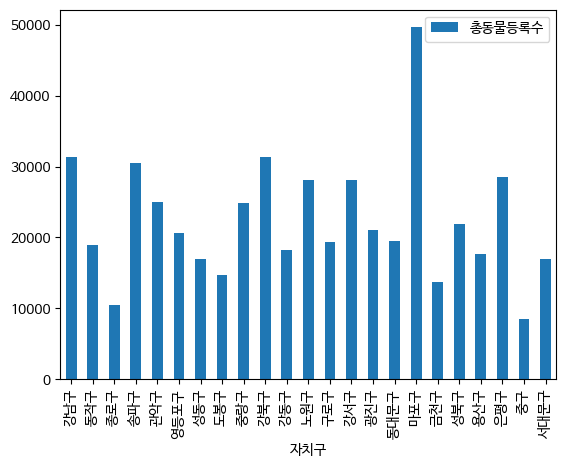

In [120]:
df.plot(kind='bar')